<a href="https://colab.research.google.com/github/ayush-singh110/Trader-Behavior-Insights/blob/main/Trader_Behavior_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part A

In [62]:
df1=pd.read_csv('fear_greed_index(1).csv')
df1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [63]:
df1.shape

(2644, 4)

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [65]:
df1.drop('value',axis=1,inplace=True)

In [66]:
df1.head()

,timestamp,classification,date
0,1517463000,Fear,2018-02-01
1,1517549400,Extreme Fear,2018-02-02
2,1517635800,Fear,2018-02-03
3,1517722200,Extreme Fear,2018-02-04
4,1517808600,Extreme Fear,2018-02-05


In [67]:
df1.isnull().sum()

,0
timestamp,0
classification,0
date,0


In [68]:
df1.duplicated().sum()

np.int64(0)

In [69]:
df1['classification'].unique()

array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

In [70]:
df1['classification']=df1['classification'].replace('Extreme Fear','Fear')
df1['classification']=df1['classification'].replace('Extreme Greed','Greed')

In [71]:
df1['classification'].value_counts()

,count
classification,
Fear,1289
Greed,959
Neutral,396


In [72]:
df1.drop('timestamp',axis=1,inplace=True)

In [73]:
df2=pd.read_csv('historical_data(1).csv')
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [74]:
df2.shape

(211224, 16)

In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [77]:
df2.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [78]:
df2.dropna(inplace=True)

In [79]:
df2.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [80]:
df2.duplicated().sum()

np.int64(0)

In [81]:
df2['Account'].unique()

array(['0xae5eacaf9c6b9111fd53034a602c192a04e082ed',
       '0x72c6a4624e1dffa724e6d00d64ceae698af892a0',
       '0x513b8629fe877bb581bf244e326a047b249c4ff1',
       '0x083384f897ee0f19899168e3b1bec365f52a9012',
       '0x430f09841d65beb3f27765503d0f850b8bce7713',
       '0x8381e6d82f1affd39a336e143e081ef7620a3b7f',
       '0x4f93fead39b70a1824f981a54d4e55b278e9f760',
       '0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4',
       '0x420ab45e0bd8863569a5efbb9c05d91f40624641',
       '0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23',
       '0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd',
       '0x6d6a4b953f202f8df5bed40692e7fd865318264a',
       '0xbaaaf6571ab7d571043ff1e313a9609a10637864',
       '0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb',
       '0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891',
       '0xa0feb3725a9335f49874d7cd8eaad6be45b27416',
       '0x8477e447846c758f5a675856001ea72298fd9cb5',
       '0x8170715b3b381dffb7062c0298972d4727a0a63b',
       '0x47add9a56df66b524d5e2c1993a43cde53b6

In [82]:
df2['Closed PnL'].unique()

array([   0.      , 3008.231185,   30.741534, ..., -112.5773  ,
        -22.4402  ,  -53.9063  ])

In [83]:
df2['Coin'].unique()

array(['@107', 'AAVE', 'DYDX', 'AIXBT', 'GMX', 'EIGEN', 'HYPE', 'SOL',
       'SUI', 'DOGE', 'ETH', 'kPEPE', 'TRUMP', 'ONDO', 'ENA', 'LINK',
       'XRP', 'S', 'BNB', 'BERA', 'WIF', 'LAYER', 'MKR', 'KAITO', 'IP',
       'JUP', 'USUAL', 'ADA', 'BTC', 'PURR/USDC', 'ZRO', '@7', '@19',
       '@21', '@44', '@48', '@11', '@15', '@46', '@61', '@28', '@45',
       '@9', '@41', '@38', 'kSHIB', 'GRASS', 'TAO', 'AVAX', '@2', '@6',
       '@8', '@10', '@12', '@16', '@17', '@35', '@26', '@24', '@32',
       '@29', '@31', '@33', '@34', '@36', '@37', '@47', '@53', '@74',
       'RUNE', 'CANTO', 'NTRN', 'BLUR', 'ZETA', 'MINA', 'MANTA', 'RNDR',
       'WLD', 'kBONK', 'ALT', 'INJ', 'STG', 'ZEN', 'MAVIA', 'PIXEL',
       'ILV', 'FET', 'STRK', 'CAKE', 'STX', 'ACE', 'PENDLE', 'AR', 'XAI',
       'APE', 'MEME', 'NEAR', 'SEI', 'FTM', 'MYRO', 'BIGTIME', 'IMX',
       'BADGER', 'POLYX', 'OP', 'TNSR', 'MAV', 'TIA', 'MERL', 'TON',
       'PURR', 'ME', 'CRV', 'BRETT', 'CHILLGUY', 'MOODENG', 'VIRTUAL',
       'CO

In [84]:
df2['Side'].unique()

array(['BUY', 'SELL'], dtype=object)

In [85]:
df2['Direction'].unique()

array(['Buy', 'Sell', 'Open Long', 'Close Long', 'Spot Dust Conversion',
       'Open Short', 'Close Short', 'Long > Short', 'Short > Long',
       'Auto-Deleveraging', 'Liquidated Isolated Short', 'Settlement'],
      dtype=object)

In [86]:
df2['Crossed'].unique()

array([ True, False])

In [87]:
df2.drop(['Transaction Hash','Timestamp'],axis=1,inplace=True)

In [89]:
df2['Date']=pd.to_datetime(df2['Timestamp IST'],format='%d-%m-%Y %H:%M').dt.date
df1['Date']=pd.to_datetime(df1['date'],format='%Y-%m-%d').dt.date

In [90]:
final_df=pd.merge(df1,df2,on='Date',how='right')
final_df.head()

,classification,date,Date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Order ID,Crossed,Fee,Trade ID
0,Greed,2024-12-02,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,52017706630,True,0.345404,8.950000e+14
1,Greed,2024-12-02,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,52017706630,True,0.005600,4.430000e+14
2,Greed,2024-12-02,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,52017706630,True,0.050431,6.600000e+14
3,Greed,2024-12-02,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,52017706630,True,0.050043,1.080000e+15
4,Greed,2024-12-02,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,52017706630,True,0.003055,1.050000e+15


In [91]:
final_df.drop('date',inplace=True,axis=1)

In [92]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   classification   211218 non-null  object 
 1   Date             211224 non-null  object 
 2   Account          211224 non-null  object 
 3   Coin             211224 non-null  object 
 4   Execution Price  211224 non-null  float64
 5   Size Tokens      211224 non-null  float64
 6   Size USD         211224 non-null  float64
 7   Side             211224 non-null  object 
 8   Timestamp IST    211224 non-null  object 
 9   Start Position   211224 non-null  float64
 10  Direction        211224 non-null  object 
 11  Closed PnL       211224 non-null  float64
 12  Order ID         211224 non-null  int64  
 13  Crossed          211224 non-null  bool   
 14  Fee              211224 non-null  float64
 15  Trade ID         211224 non-null  float64
dtypes: bool(1), float64(7), int64(1), obje

In [93]:
final_df.isnull().sum()

,0
classification,6
Date,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0


In [94]:
final_df.duplicated().sum()

np.int64(0)

In [99]:
g=final_df.groupby(['Account'])['Closed PnL'].sum()
g.head()

,Closed PnL
Account,
0x083384f897ee0f19899168e3b1bec365f52a9012,1.600230e+06
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,4.788532e+04
0x271b280974205ca63b716753467d5a371de622ab,-7.043619e+04
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,1.324648e+05
0x2c229d22b100a7beb69122eed721cee9b24011dd,1.686580e+05


In [106]:
daily_pnl_per_account = final_df.groupby(['Date', 'Account'])['Closed PnL'].sum().reset_index()
daily_pnl_per_account.head()

,Date,Account,Closed PnL
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-205.434737
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-24.632034
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000


In [108]:
winning_trades_count = final_df[final_df['Closed PnL'] > 0].shape[0]
print(f"Number of winning trades: {winning_trades_count}")

Number of winning trades: 86869


In [110]:
total_trades = final_df.shape[0]
win_rate = (winning_trades_count / total_trades) * 100
print(f"Overall Win Rate: {win_rate:.2f}%")

Overall Win Rate: 41.13%


In [112]:
average_trade_size_usd = final_df['Size USD'].mean()
print(f"Average Trade Size (USD): {average_trade_size_usd:.2f}")

Average Trade Size (USD): 5639.45


## Part B

In [113]:
pnl_by_classification = final_df.groupby('classification')['Closed PnL'].sum()
print("Sum of 'Closed PnL' by classification:\n", pnl_by_classification)

Sum of 'Closed PnL' by classification:
 classification
Fear       4.096266e+06
Greed      4.865301e+06
Neutral    1.292921e+06
Name: Closed PnL, dtype: float64


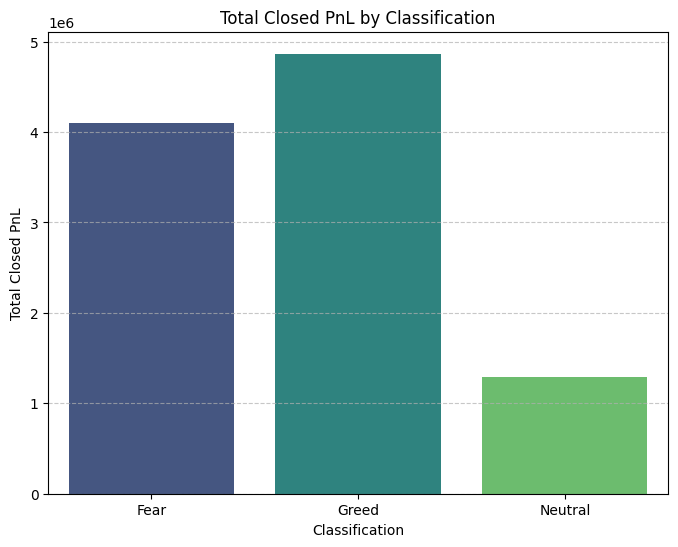

In [115]:
plt.figure(figsize=(8, 6))
sns.barplot(x=pnl_by_classification.index, y=pnl_by_classification.values, hue=pnl_by_classification.index, palette='viridis', legend=False)
plt.title('Total Closed PnL by Classification')
plt.xlabel('Classification')
plt.ylabel('Total Closed PnL')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [116]:
total_trades_by_classification = final_df.groupby('classification').size().rename('total_trades')
winning_trades_by_classification = final_df[final_df['Closed PnL'] > 0].groupby('classification').size().rename('winning_trades')

win_rate_by_classification = pd.DataFrame({
    'total_trades': total_trades_by_classification,
    'winning_trades': winning_trades_by_classification
})

win_rate_by_classification['win_rate'] = (win_rate_by_classification['winning_trades'] / win_rate_by_classification['total_trades']) * 100

print("Win Rate by Classification:\n", win_rate_by_classification)


Win Rate by Classification:
                 total_trades  winning_trades   win_rate
classification                                         
Fear                   83237           33950  40.787150
Greed                  90295           37952  42.031120
Neutral                37686           14961  39.699093


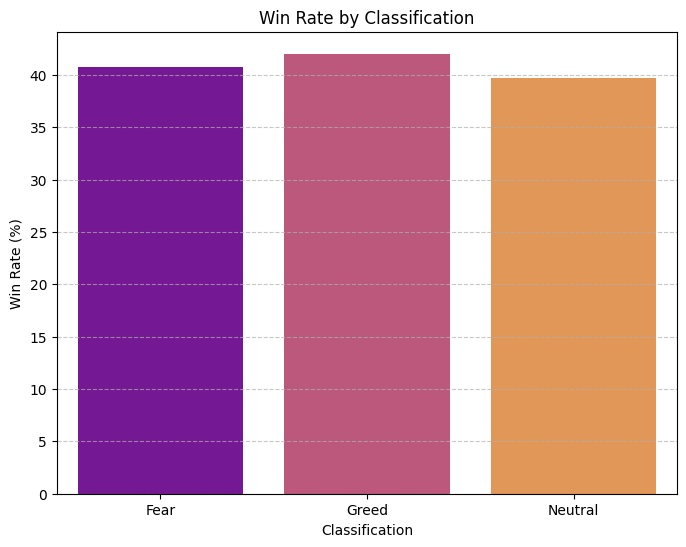

In [117]:
plt.figure(figsize=(8, 6))
sns.barplot(x=win_rate_by_classification.index, y=win_rate_by_classification['win_rate'], hue=win_rate_by_classification.index, palette='plasma', legend=False)
plt.title('Win Rate by Classification')
plt.xlabel('Classification')
plt.ylabel('Win Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [118]:
losing_trades_by_classification = final_df[final_df['Closed PnL'] < 0].groupby('classification')['Closed PnL'].mean().rename('average_loss')
print("Average Loss (Drawdown Proxy) by Classification:\n", losing_trades_by_classification)

Average Loss (Drawdown Proxy) by Classification:
 classification
Fear      -196.346650
Greed     -164.613823
Neutral   -121.727849
Name: average_loss, dtype: float64


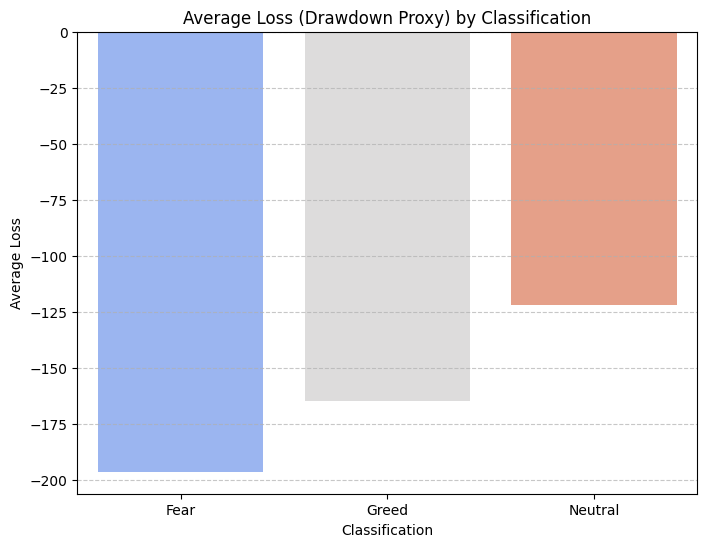

In [119]:
plt.figure(figsize=(8, 6))
sns.barplot(x=losing_trades_by_classification.index, y=losing_trades_by_classification.values, hue=losing_trades_by_classification.index, palette='coolwarm', legend=False)
plt.title('Average Loss (Drawdown Proxy) by Classification')
plt.xlabel('Classification')
plt.ylabel('Average Loss')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [120]:
total_loss_by_classification = final_df[final_df['Closed PnL'] < 0].groupby('classification')['Closed PnL'].sum()
print("Total Loss (Drawdown Proxy) by Classification:\n", total_loss_by_classification)

Total Loss (Drawdown Proxy) by Classification:
 classification
Fear      -1.229915e+06
Greed     -1.329586e+06
Neutral   -3.892857e+05
Name: Closed PnL, dtype: float64


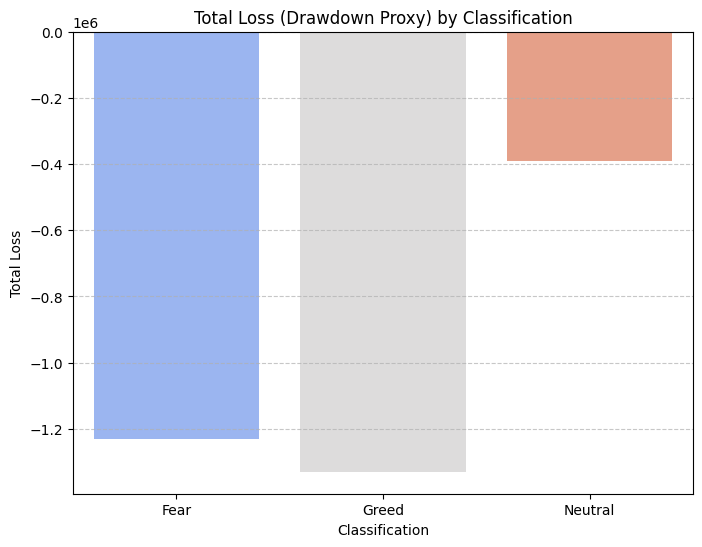

In [121]:
plt.figure(figsize=(8, 6))
sns.barplot(x=total_loss_by_classification.index, y=total_loss_by_classification.values, hue=total_loss_by_classification.index, palette='coolwarm', legend=False)
plt.title('Total Loss (Drawdown Proxy) by Classification')
plt.xlabel('Classification')
plt.ylabel('Total Loss')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [122]:
trade_frequency_by_sentiment = final_df.groupby('classification').size().rename('trade_count')
print("Total number of trades by market sentiment classification:\n", trade_frequency_by_sentiment)

Total number of trades by market sentiment classification:
 classification
Fear       83237
Greed      90295
Neutral    37686
Name: trade_count, dtype: int64


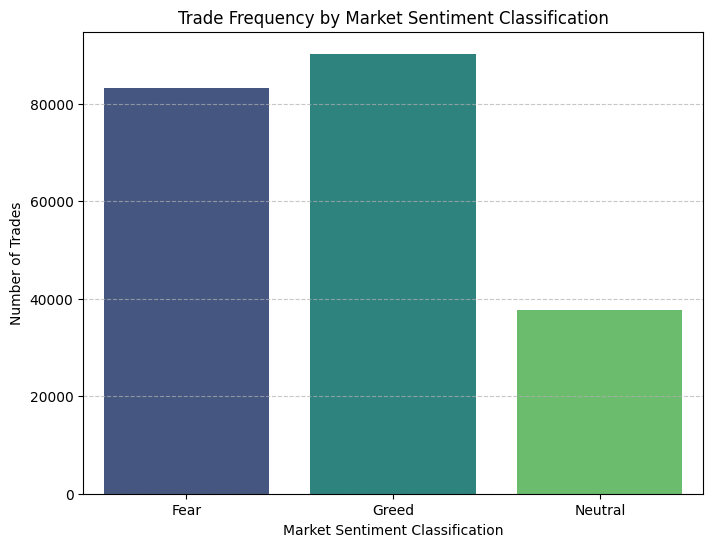

In [123]:
plt.figure(figsize=(8, 6))
sns.barplot(x=trade_frequency_by_sentiment.index, y=trade_frequency_by_sentiment.values, hue=trade_frequency_by_sentiment.index, palette='viridis', legend=False)
plt.title('Trade Frequency by Market Sentiment Classification')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Number of Trades')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [124]:
long_short_bias = final_df.groupby(['classification', 'Side']).size().unstack(fill_value=0)
print("Long/Short Bias by Classification:\n", long_short_bias)

Long/Short Bias by Classification:
 Side              BUY   SELL
classification              
Fear            41205  42032
Greed           42516  47779
Neutral         18969  18717


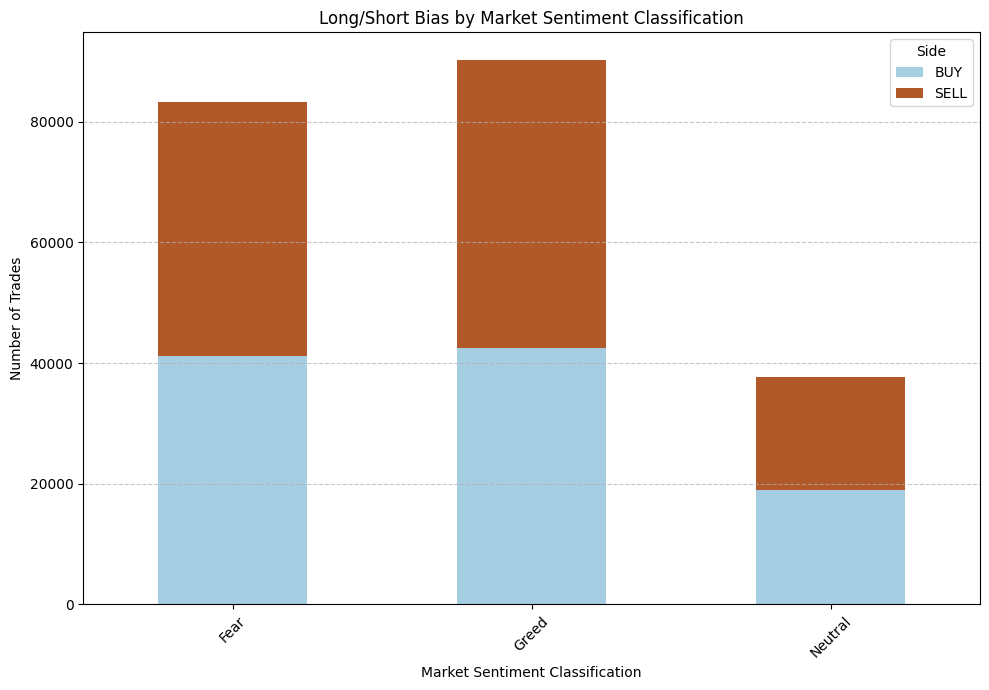

In [125]:
long_short_bias.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='Paired')
plt.title('Long/Short Bias by Market Sentiment Classification')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.legend(title='Side')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [126]:
average_position_size = final_df.groupby('classification')['Size USD'].mean()
print("Average Position Size (USD) by Classification:\n", average_position_size)

Average Position Size (USD) by Classification:
 classification
Fear       7182.011019
Greed      4574.424490
Neutral    4782.732661
Name: Size USD, dtype: float64


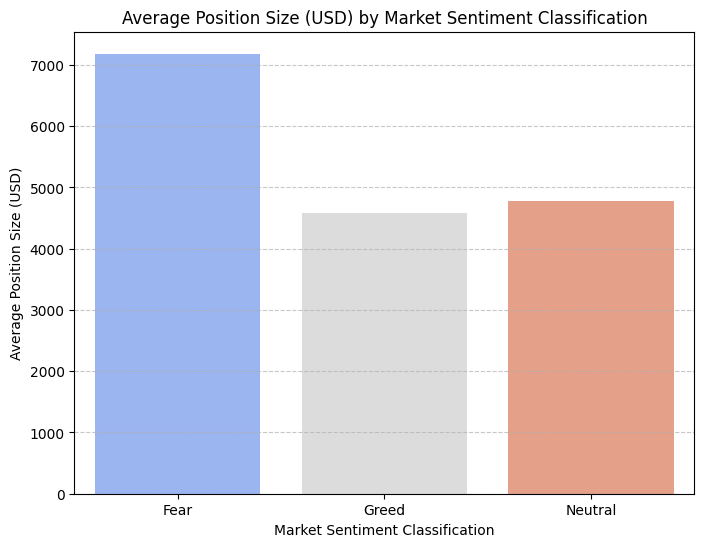

In [127]:
plt.figure(figsize=(8, 6))
sns.barplot(x=average_position_size.index, y=average_position_size.values, hue=average_position_size.index, palette='coolwarm', legend=False)
plt.title('Average Position Size (USD) by Market Sentiment Classification')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Average Position Size (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [128]:
trading_frequency = final_df.groupby('Account')['Date'].nunique().reset_index(name='trading_days')
trading_frequency.head()

,Account,trading_days
0,0x083384f897ee0f19899168e3b1bec365f52a9012,24
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,52
2,0x271b280974205ca63b716753467d5a371de622ab,12
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,162
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,69


In [129]:
median_trading_days = trading_frequency['trading_days'].median()

trading_frequency['frequency_segment'] = trading_frequency['trading_days'].apply(
    lambda x: 'Frequent' if x >= median_trading_days else 'Infrequent'
)

print(f"Median number of trading days: {median_trading_days}")
print("\nTrading Frequency DataFrame Head:\n", trading_frequency.head())
print("\nFrequency Segment Value Counts:\n", trading_frequency['frequency_segment'].value_counts())

Median number of trading days: 46.5

Trading Frequency DataFrame Head:
                                       Account  trading_days frequency_segment
0  0x083384f897ee0f19899168e3b1bec365f52a9012            24        Infrequent
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd            52          Frequent
2  0x271b280974205ca63b716753467d5a371de622ab            12        Infrequent
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4           162          Frequent
4  0x2c229d22b100a7beb69122eed721cee9b24011dd            69          Frequent

Frequency Segment Value Counts:
 frequency_segment
Infrequent    16
Frequent      16
Name: count, dtype: int64


In [130]:
pnl_performance = final_df.groupby('Account')['Closed PnL'].sum().reset_index(name='total_pnl')
median_total_pnl = pnl_performance['total_pnl'].median()

pnl_performance['pnl_segment'] = pnl_performance['total_pnl'].apply(
    lambda x: 'High PnL' if x >= median_total_pnl else 'Low PnL'
)

print(f"Median Total PnL: {median_total_pnl:.2f}")
print("\nPnL Performance DataFrame Head:\n", pnl_performance.head())
print("\nPnL Segment Value Counts:\n", pnl_performance['pnl_segment'].value_counts())

Median Total PnL: 117655.08

PnL Performance DataFrame Head:
                                       Account     total_pnl pnl_segment
0  0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06    High PnL
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  4.788532e+04     Low PnL
2  0x271b280974205ca63b716753467d5a371de622ab -7.043619e+04     Low PnL
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4  1.324648e+05    High PnL
4  0x2c229d22b100a7beb69122eed721cee9b24011dd  1.686580e+05    High PnL

PnL Segment Value Counts:
 pnl_segment
High PnL    16
Low PnL     16
Name: count, dtype: int64


In [131]:
merged_df = pd.merge(final_df, trading_frequency[['Account', 'frequency_segment']], on='Account', how='left')
merged_df = pd.merge(merged_df, pnl_performance[['Account', 'pnl_segment']], on='Account', how='left')
merged_df.head()

,classification,Date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Order ID,Crossed,Fee,Trade ID,frequency_segment,pnl_segment
0,Greed,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,52017706630,True,0.345404,8.950000e+14,Infrequent,Low PnL
1,Greed,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,52017706630,True,0.005600,4.430000e+14,Infrequent,Low PnL
2,Greed,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,52017706630,True,0.050431,6.600000e+14,Infrequent,Low PnL
3,Greed,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,52017706630,True,0.050043,1.080000e+15,Infrequent,Low PnL
4,Greed,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,52017706630,True,0.003055,1.050000e+15,Infrequent,Low PnL


In [142]:
win_rate_frequency = merged_df.groupby('frequency_segment').apply(lambda x: (x['Closed PnL'] > 0).sum() / len(x) * 100).rename('win_rate_%')
win_rate_pnl = merged_df.groupby('pnl_segment').apply(lambda x: (x['Closed PnL'] > 0).sum() / len(x) * 100).rename('win_rate_%')

win_rate_frequency_df = win_rate_frequency.reset_index()
win_rate_frequency_df.columns = ['Segment_Category', 'Win_Rate_%']
win_rate_frequency_df.insert(0, 'Segment_Type', 'Trading Frequency')

win_rate_pnl_df = win_rate_pnl.reset_index()
win_rate_pnl_df.columns = ['Segment_Category', 'Win_Rate_%']
win_rate_pnl_df.insert(0, 'Segment_Type', 'PnL Performance')

win_rate_summary = pd.concat([win_rate_frequency_df, win_rate_pnl_df])

print("Win Rate Summary by Trader Segment:")
print(win_rate_summary)

Win Rate Summary by Trader Segment:
        Segment_Type Segment_Category  Win_Rate_%
0  Trading Frequency         Frequent   41.150998
1  Trading Frequency       Infrequent   41.064639
0    PnL Performance         High PnL   44.132908
1    PnL Performance          Low PnL   35.105551


/tmp/ipython-input-2986909071.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  win_rate_frequency = merged_df.groupby('frequency_segment').apply(lambda x: (x['Closed PnL'] > 0).sum() / len(x) * 100).rename('win_rate_%')
/tmp/ipython-input-2986909071.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  win_rate_pnl = merged_df.groupby('pnl_segment').apply(lambda x: (x['Closed PnL'] > 0).sum() / len(x) * 10

Win Rate Summary by Trader Segment:
        Segment_Type Segment_Category  Win_Rate_%
0  Trading Frequency         Frequent   41.150998
1  Trading Frequency       Infrequent   41.064639
0    PnL Performance         High PnL   44.132908
1    PnL Performance          Low PnL   35.105551


/tmp/ipython-input-803656751.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment_Category', y='Win_Rate_%', data=win_rate_summary[win_rate_summary['Segment_Type'] == 'Trading Frequency'], palette='viridis')


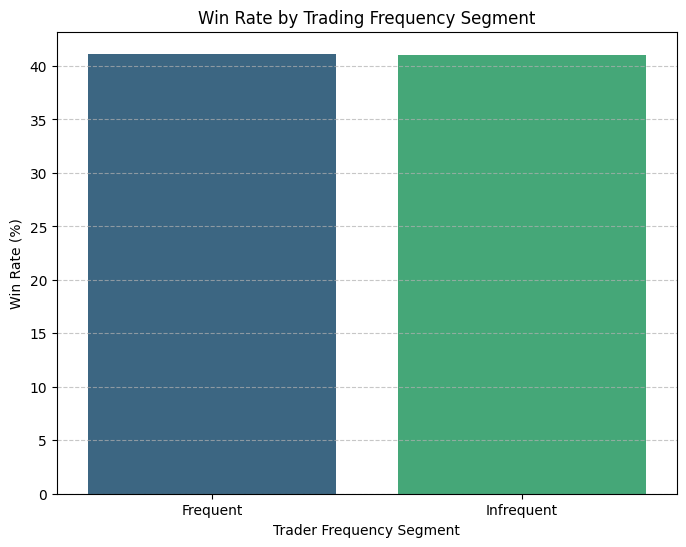

/tmp/ipython-input-803656751.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment_Category', y='Win_Rate_%', data=win_rate_summary[win_rate_summary['Segment_Type'] == 'PnL Performance'], palette='plasma')


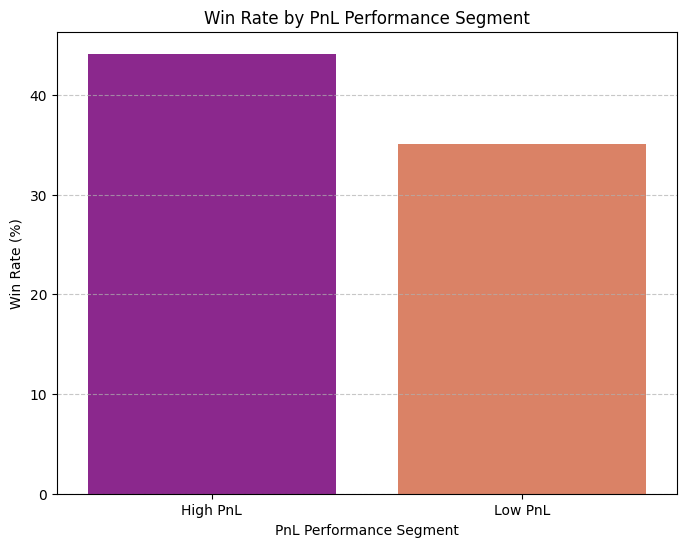

In [141]:
win_rate_frequency = merged_df.groupby('frequency_segment')['Closed PnL'].apply(lambda x: (x > 0).mean() * 100).rename('win_rate_%')
win_rate_pnl = merged_df.groupby('pnl_segment')['Closed PnL'].apply(lambda x: (x > 0).mean() * 100).rename('win_rate_%')

win_rate_frequency_df = win_rate_frequency.reset_index()
win_rate_frequency_df.columns = ['Segment_Category', 'Win_Rate_%']
win_rate_frequency_df.insert(0, 'Segment_Type', 'Trading Frequency')


win_rate_pnl_df = win_rate_pnl.reset_index()
win_rate_pnl_df.columns = ['Segment_Category', 'Win_Rate_%']
win_rate_pnl_df.insert(0, 'Segment_Type', 'PnL Performance')


win_rate_summary = pd.concat([win_rate_frequency_df, win_rate_pnl_df])

print("Win Rate Summary by Trader Segment:")
print(win_rate_summary)

plt.figure(figsize=(8, 6))
sns.barplot(x='Segment_Category', y='Win_Rate_%', data=win_rate_summary[win_rate_summary['Segment_Type'] == 'Trading Frequency'], palette='viridis')
plt.title('Win Rate by Trading Frequency Segment')
plt.xlabel('Trader Frequency Segment')
plt.ylabel('Win Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Segment_Category', y='Win_Rate_%', data=win_rate_summary[win_rate_summary['Segment_Type'] == 'PnL Performance'], palette='plasma')
plt.title('Win Rate by PnL Performance Segment')
plt.xlabel('PnL Performance Segment')
plt.ylabel('Win Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Average Trade Size Summary by Trader Segment:
        Segment_Type Segment_Category  Average_Trade_Size_USD
0  Trading Frequency         Frequent             2894.533189
1  Trading Frequency       Infrequent            12563.543998
0    PnL Performance         High PnL             6703.408200
1    PnL Performance          Low PnL             3508.678636


/tmp/ipython-input-1474884270.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment_Category', y='Average_Trade_Size_USD', data=average_trade_size_summary[average_trade_size_summary['Segment_Type'] == 'Trading Frequency'], palette='viridis')


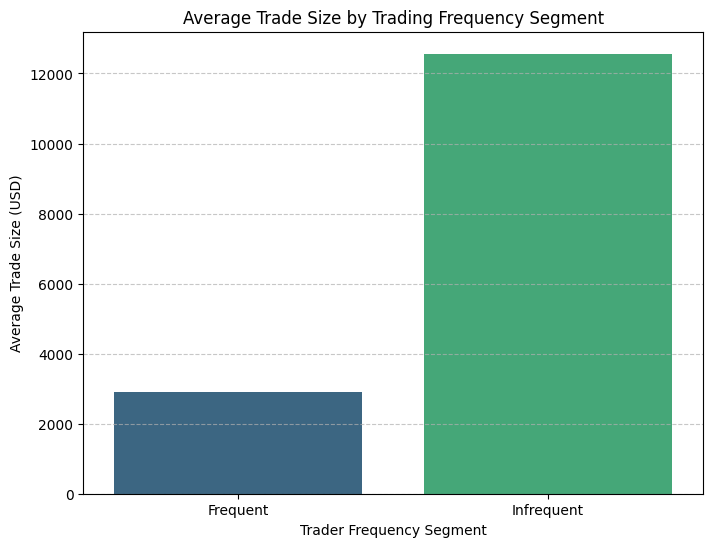

/tmp/ipython-input-1474884270.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment_Category', y='Average_Trade_Size_USD', data=average_trade_size_summary[average_trade_size_summary['Segment_Type'] == 'PnL Performance'], palette='plasma')


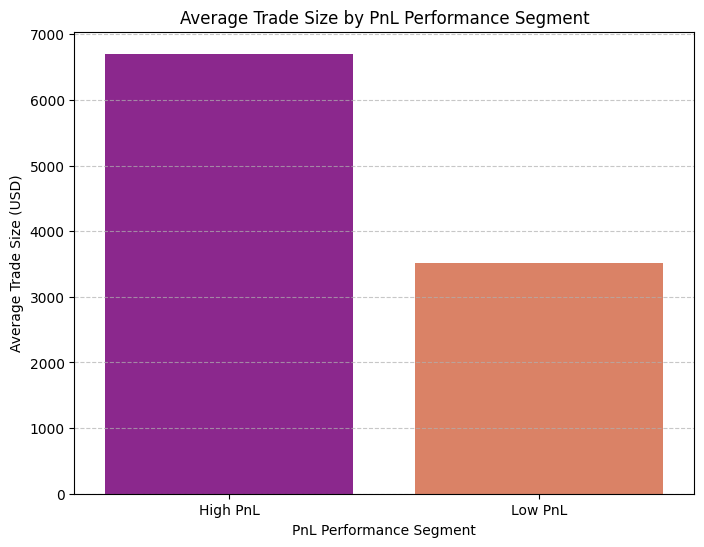

In [140]:
average_trade_size_frequency = merged_df.groupby('frequency_segment')['Size USD'].mean().rename('average_trade_size')
average_trade_size_pnl = merged_df.groupby('pnl_segment')['Size USD'].mean().rename('average_trade_size')


average_trade_size_frequency_df = average_trade_size_frequency.reset_index()
average_trade_size_frequency_df.columns = ['Segment_Category', 'Average_Trade_Size_USD']
average_trade_size_frequency_df.insert(0, 'Segment_Type', 'Trading Frequency')


average_trade_size_pnl_df = average_trade_size_pnl.reset_index()
average_trade_size_pnl_df.columns = ['Segment_Category', 'Average_Trade_Size_USD']
average_trade_size_pnl_df.insert(0, 'Segment_Type', 'PnL Performance')


average_trade_size_summary = pd.concat([average_trade_size_frequency_df, average_trade_size_pnl_df])

print("Average Trade Size Summary by Trader Segment:")
print(average_trade_size_summary)

plt.figure(figsize=(8, 6))
sns.barplot(x='Segment_Category', y='Average_Trade_Size_USD', data=average_trade_size_summary[average_trade_size_summary['Segment_Type'] == 'Trading Frequency'], palette='viridis')
plt.title('Average Trade Size by Trading Frequency Segment')
plt.xlabel('Trader Frequency Segment')
plt.ylabel('Average Trade Size (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Segment_Category', y='Average_Trade_Size_USD', data=average_trade_size_summary[average_trade_size_summary['Segment_Type'] == 'PnL Performance'], palette='plasma')
plt.title('Average Trade Size by PnL Performance Segment')
plt.xlabel('PnL Performance Segment')
plt.ylabel('Average Trade Size (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Average PnL by PnL Segment and Market Sentiment:
classification       Fear      Greed    Neutral
pnl_segment                                    
High PnL        66.376283  81.517770  48.969370
Low PnL          7.490083   6.573438   5.758374


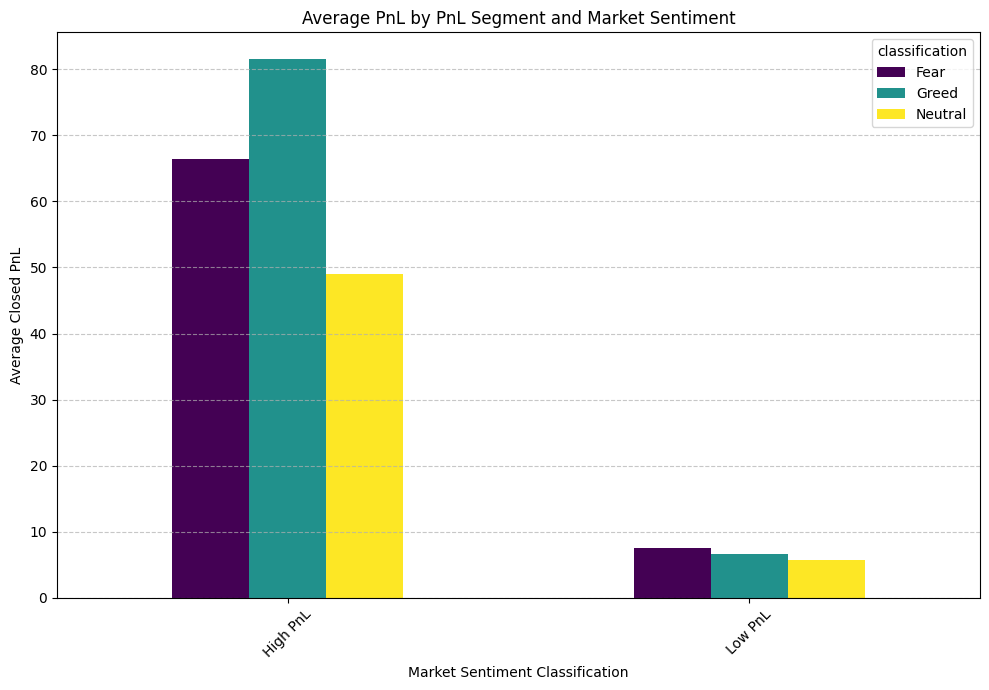

In [136]:
pnl_by_sentiment_and_segment = merged_df.groupby(['pnl_segment', 'classification'])['Closed PnL'].mean().unstack()

print("Average PnL by PnL Segment and Market Sentiment:")
print(pnl_by_sentiment_and_segment)

pnl_by_sentiment_and_segment.plot(kind='bar', figsize=(10, 7), colormap='viridis')
plt.title('Average PnL by PnL Segment and Market Sentiment')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##Bonus

In [143]:
trader_features = merged_df.groupby('Account').agg(
    total_pnl=('Closed PnL', 'sum'),
    total_trades=('Order ID', 'count'),
    winning_trades=('Closed PnL', lambda x: (x > 0).sum()),
    average_trade_size=('Size USD', 'mean'),
    buy_trades=('Side', lambda x: (x == 'BUY').sum()),
    sell_trades=('Side', lambda x: (x == 'SELL').sum())
)

print("Trader Features initial aggregation:")
print(trader_features.head())

Trader Features initial aggregation:
                                               total_pnl  total_trades  \
Account                                                                  
0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06          3818   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  4.788532e+04          7280   
0x271b280974205ca63b716753467d5a371de622ab -7.043619e+04          3809   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4  1.324648e+05         13311   
0x2c229d22b100a7beb69122eed721cee9b24011dd  1.686580e+05          3239   

                                            winning_trades  \
Account                                                      
0x083384f897ee0f19899168e3b1bec365f52a9012            1373   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd            3223   
0x271b280974205ca63b716753467d5a371de622ab            1150   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4            5838   
0x2c229d22b100a7beb69122eed721cee9b24011dd            1684   

         

In [144]:
trader_features['win_rate'] = (trader_features['winning_trades'] / trader_features['total_trades']) * 100
trader_features['long_short_bias'] = (trader_features['buy_trades'] - trader_features['sell_trades']) / (trader_features['buy_trades'] + trader_features['sell_trades'])

print("Trader Features after adding win_rate and long_short_bias:")
print(trader_features.head())

Trader Features after adding win_rate and long_short_bias:
                                               total_pnl  total_trades  \
Account                                                                  
0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06          3818   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  4.788532e+04          7280   
0x271b280974205ca63b716753467d5a371de622ab -7.043619e+04          3809   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4  1.324648e+05         13311   
0x2c229d22b100a7beb69122eed721cee9b24011dd  1.686580e+05          3239   

                                            winning_trades  \
Account                                                      
0x083384f897ee0f19899168e3b1bec365f52a9012            1373   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd            3223   
0x271b280974205ca63b716753467d5a371de622ab            1150   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4            5838   
0x2c229d22b100a7beb69122eed721cee9b24011dd        

In [156]:
sentiment_dummies = pd.get_dummies(merged_df[['Account', 'classification']], columns=['classification'], prefix='sentiment')
sentiment_dummies = sentiment_dummies.groupby('Account').mean()


for col in ['sentiment_Fear', 'sentiment_Greed', 'sentiment_Neutral']:
    if col not in sentiment_dummies.columns:
        sentiment_dummies[col] = 0.0

print("Sentiment exposure features:")
print(sentiment_dummies.head())

Sentiment exposure features:
                                            sentiment_Fear  sentiment_Greed  \
Account                                                                       
0x083384f897ee0f19899168e3b1bec365f52a9012        0.491881         0.397852   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd        0.383516         0.517582   
0x271b280974205ca63b716753467d5a371de622ab        0.699659         0.143082   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4        0.148223         0.785140   
0x2c229d22b100a7beb69122eed721cee9b24011dd        0.152207         0.534424   

                                            sentiment_Neutral  
Account                                                        
0x083384f897ee0f19899168e3b1bec365f52a9012           0.110267  
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd           0.098901  
0x271b280974205ca63b716753467d5a371de622ab           0.157259  
0x28736f43f1e871e6aa8b1148d38d4994275d72c4           0.066637  
0x2c229d22b100a7beb69122eed721cee

**Reasoning**:
I will merge the `sentiment_dummies` DataFrame, which contains the sentiment exposure features, into the `trader_features` DataFrame. This will combine all calculated features for each account into a single DataFrame. The merge will be performed on the index, which is 'Account', ensuring proper alignment.



In [146]:
trader_features = pd.merge(trader_features, sentiment_dummies, left_index=True, right_index=True, how='left')

print("Trader Features after merging sentiment exposure:")
print(trader_features.head())
print("\nTrader Features Info:")
trader_features.info()

Trader Features after merging sentiment exposure:
                                               total_pnl  total_trades  \
Account                                                                  
0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06          3818   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  4.788532e+04          7280   
0x271b280974205ca63b716753467d5a371de622ab -7.043619e+04          3809   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4  1.324648e+05         13311   
0x2c229d22b100a7beb69122eed721cee9b24011dd  1.686580e+05          3239   

                                            winning_trades  \
Account                                                      
0x083384f897ee0f19899168e3b1bec365f52a9012            1373   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd            3223   
0x271b280974205ca63b716753467d5a371de622ab            1150   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4            5838   
0x2c229d22b100a7beb69122eed721cee9b24011dd            1684 

In [155]:
from sklearn.preprocessing import StandardScaler


clustering_features = trader_features.drop(columns=['buy_trades', 'sell_trades'])


scaler = StandardScaler()

scaled_data = scaler.fit_transform(clustering_features)

scaled_features = pd.DataFrame(scaled_data, columns=clustering_features.columns, index=trader_features.index)

print("Scaled Features Head:")
print(scaled_features.head())
print("\nScaled Features Info:")
scaled_features.info()

Scaled Features Head:
                                            total_pnl  total_trades  \
Account                                                               
0x083384f897ee0f19899168e3b1bec365f52a9012   2.624967     -0.342685   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  -0.562372      0.083647   
0x271b280974205ca63b716753467d5a371de622ab  -0.805315     -0.343793   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4  -0.388710      0.826341   
0x2c229d22b100a7beb69122eed721cee9b24011dd  -0.314396     -0.413986   

                                            winning_trades  \
Account                                                      
0x083384f897ee0f19899168e3b1bec365f52a9012       -0.379277   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd        0.143705   
0x271b280974205ca63b716753467d5a371de622ab       -0.442317   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4        0.882947   
0x2c229d22b100a7beb69122eed721cee9b24011dd       -0.291359   

                                            a

In [148]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


**Reasoning**:
I will calculate the Silhouette scores for a range of cluster numbers (2 to 10) to determine the optimal number of clusters for K-Means clustering. Then, I will plot these scores to visualize the optimal number of clusters.



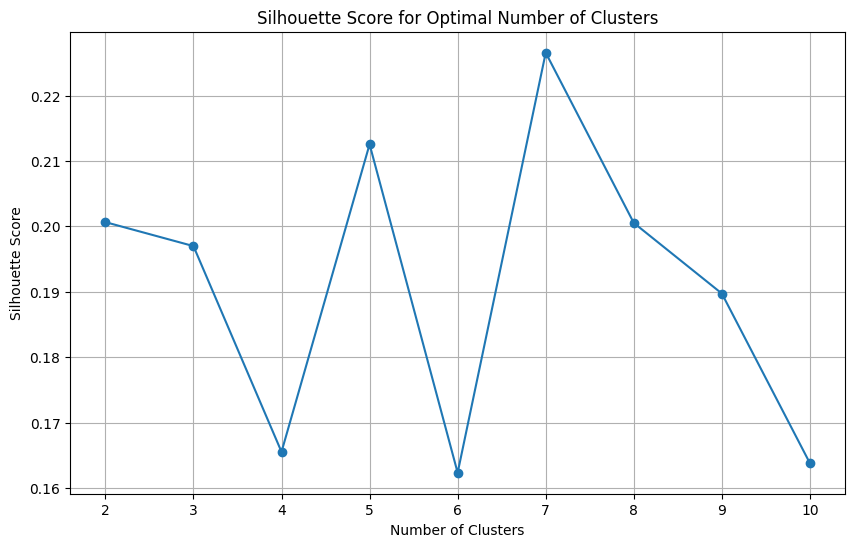

Silhouette scores calculated and plotted.


In [149]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

print("Silhouette scores calculated and plotted.")

In [150]:
optimal_clusters = 7 # Based on the peak of the Silhouette score plot

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_features)

trader_features['cluster'] = cluster_labels

print(f"K-Means clustering applied with {optimal_clusters} clusters.")
print("\nTrader Features with Cluster Labels (Head):")
print(trader_features.head())

print("\nDistribution of Traders Across Clusters:")
print(trader_features['cluster'].value_counts())

K-Means clustering applied with 7 clusters.

Trader Features with Cluster Labels (Head):
                                               total_pnl  total_trades  \
Account                                                                  
0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06          3818   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  4.788532e+04          7280   
0x271b280974205ca63b716753467d5a371de622ab -7.043619e+04          3809   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4  1.324648e+05         13311   
0x2c229d22b100a7beb69122eed721cee9b24011dd  1.686580e+05          3239   

                                            winning_trades  \
Account                                                      
0x083384f897ee0f19899168e3b1bec365f52a9012            1373   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd            3223   
0x271b280974205ca63b716753467d5a371de622ab            1150   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4            5838   
0x2c229d22b100a7beb6

In [151]:
scaled_features_with_clusters = scaled_features.copy()
scaled_features_with_clusters['cluster'] = trader_features['cluster']

scaled_cluster_centroids = scaled_features_with_clusters.groupby('cluster').mean()

print("Scaled Cluster Centroids:")
print(scaled_cluster_centroids)

Scaled Cluster Centroids:
         total_pnl  total_trades  winning_trades  average_trade_size  \
cluster                                                                
0        -0.128316     -0.357647       -0.022236           -0.482374   
1        -0.349160     -0.543146       -0.536148           -0.118315   
2        -0.484302      0.265657        0.084481           -0.311430   
3         0.225191      0.238442        0.226393            3.131652   
4         1.162838      2.966250        3.065477           -0.485682   
5        -0.433679      0.043609       -0.060929           -0.304195   
6         3.182579      0.329385        0.128722            0.556878   

         win_rate  long_short_bias  sentiment_Fear  sentiment_Greed  \
cluster                                                               
0        1.816467        -0.899488       -0.945155         0.938208   
1       -0.360646        -0.451144        0.756946        -0.615272   
2       -0.609353         1.553495       

In [152]:
unscaled_cluster_centroids = trader_features.groupby('cluster').mean()

print("\nUnscaled Cluster Centroids:")
print(unscaled_cluster_centroids)


Unscaled Cluster Centroids:
            total_pnl  total_trades  winning_trades  average_trade_size  \
cluster                                                                   
0        2.592854e+05   3696.500000     2636.000000         2551.046698   
1        1.517271e+05   2190.166667      818.083333         5160.040727   
2        8.590827e+04   8758.000000     3013.500000         3776.098644   
3        4.314555e+05   8537.000000     3515.500000        28450.568057   
4        8.881222e+05  30688.000000    13558.500000         2527.342359   
5        1.105634e+05   6954.875000     2499.125000         3827.948011   
6        1.871806e+06   9275.500000     3170.000000         9998.731054   

           buy_trades   sell_trades   win_rate  long_short_bias  \
cluster                                                           
0         1641.500000   2055.000000  59.704187        -0.259764   
1          971.833333   1218.333333  36.454943        -0.167665   
2         5569.000000   318

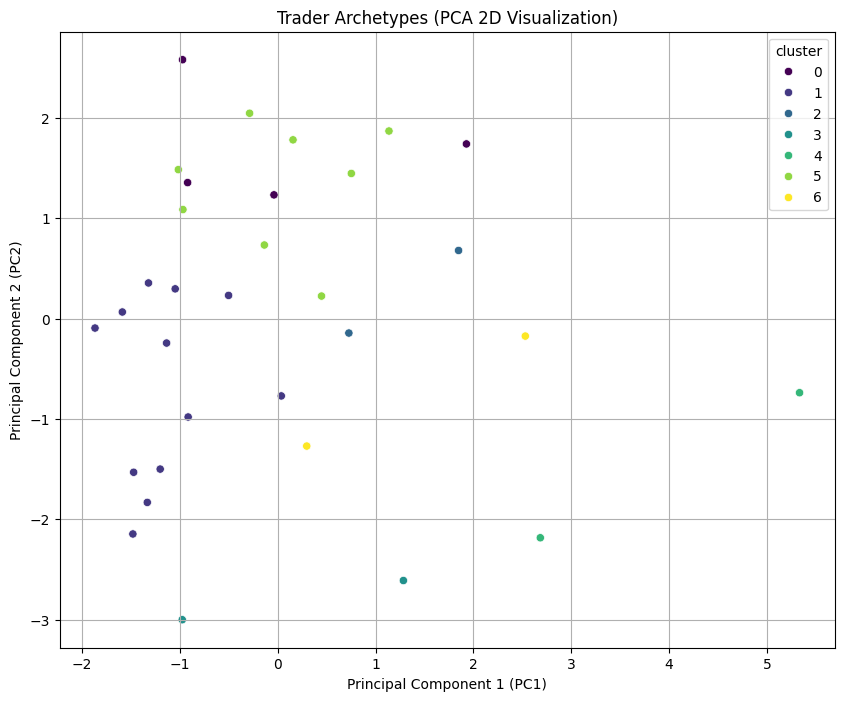

PCA and visualization complete, showing trader archetypes in 2D.


In [154]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2, random_state=42)

pca_components = pca.fit_transform(scaled_features)


pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'], index=scaled_features.index)


pca_df_with_clusters = pd.merge(pca_df, trader_features[['cluster']], left_index=True, right_index=True, how='left')


plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='cluster',
    palette='viridis',
    data=pca_df_with_clusters,
    legend='full'
)
plt.title('Trader Archetypes (PCA 2D Visualization)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()

print("PCA and visualization complete, showing trader archetypes in 2D.")